# Excel Automotriz Brasil

## Importando datos a python

In [1]:
# Importando librerias
import pandas as pd
import os
import math as mt
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn
import statistics
from scipy import stats

In [2]:
#archivo Datos_clientes_autos en google drive
url = 'https://docs.google.com/spreadsheets/d/1ddaJGZ20ft1rxeICEShcc4Ley2qwPt5x/export'

In [3]:
# importando las 4 hojas Desde google drive, es mejor esta forma porque ya no hay que cargar cada vez el archivo que se inicia sesion
data_ventas_autos = pd.read_excel(url, sheet_name= 'Ventas_Autos')
data_clientes = pd.read_excel(url, sheet_name= 'Clientes')
data_vendedores = pd.read_excel(url, sheet_name= 'Vendedores')
data_modelos_autos = pd.read_excel(url, sheet_name= 'Modelos_Autos')

## Entendiendo los datos

In [4]:
data_ventas_autos.head(5)


,ID_Vehiculo,Cliente,Vendedor,Origen_Venta,Año_Venta,Fecha Venta,Modelo,Color,Precio_Venta_USD,IVA_USD,Costo_USD,Satisfaccion
0,32942,10001,V0901,Sala,2020,2020-12-29,4658,BLANCO,14688.53003,"1909,51",11442.36489,Regular
1,32944,10003,V0923,Sala,2020,2020-12-30,4367,NEGRO,11033.02319,1434.29302,8131.33809,Regular
2,32946,10005,V0357,Social Media,2020,2020-12-28,6093,GRIS,10040.91500,"1305,32",6466.34926,Muy Buena
3,32948,10007,V0503,Sala,2020,2020-12-23,5061,BLANCO,18853.11004,2450.90431,14498.04162,Muy Mala
4,32950,10009,V0400,Sala,2020,2020-12-29,6108,ROJO,12479.59247,"1622,35",8149.17388,Muy Buena


In [74]:
#creamos un linea temporal
ventas_por_fecha = data_ventas_autos.groupby('Fecha Venta').size().reset_index(name='Autos vendidos')
ventas_por_fecha.head(5)


,Fecha Venta,Autos vendidos
0,2015-01-05,2
1,2015-01-06,2
2,2015-01-07,11
3,2015-01-08,17
4,2015-01-09,11


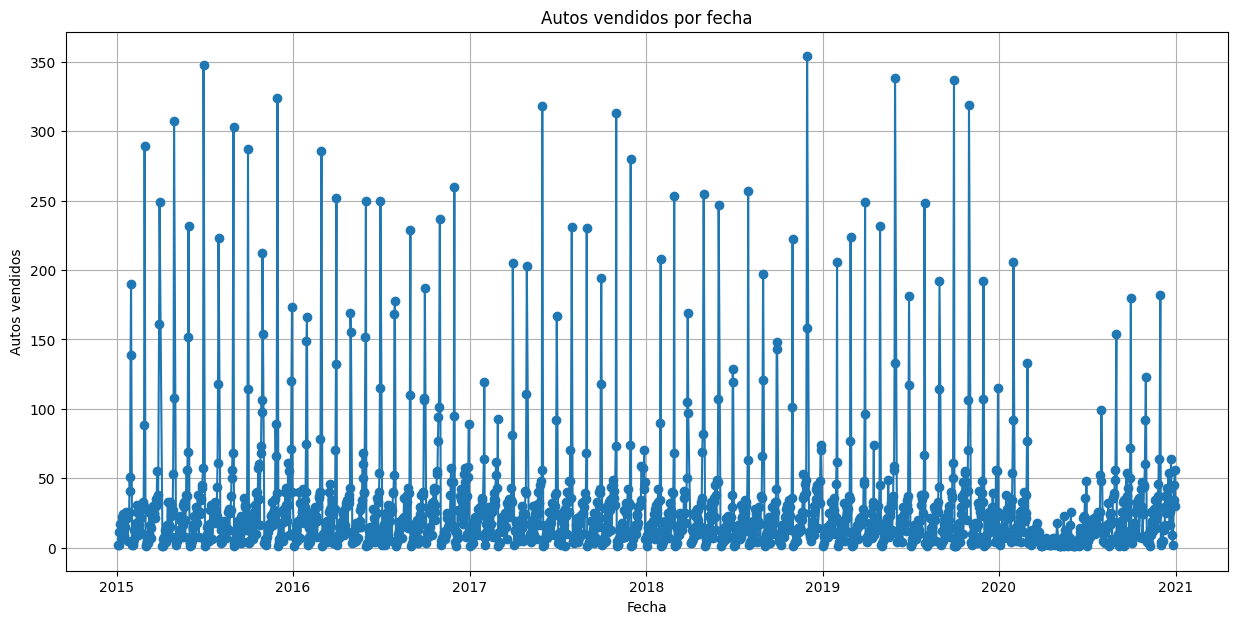

In [73]:
# Plotting
plt.figure(figsize=(15, 7))
plt.plot(ventas_por_fecha['Fecha Venta'], ventas_por_fecha['Autos vendidos'], marker='o')
plt.xlabel('Fecha')
plt.ylabel('Autos vendidos')
plt.title('Autos vendidos por fecha')
plt.grid(True)
plt.show()

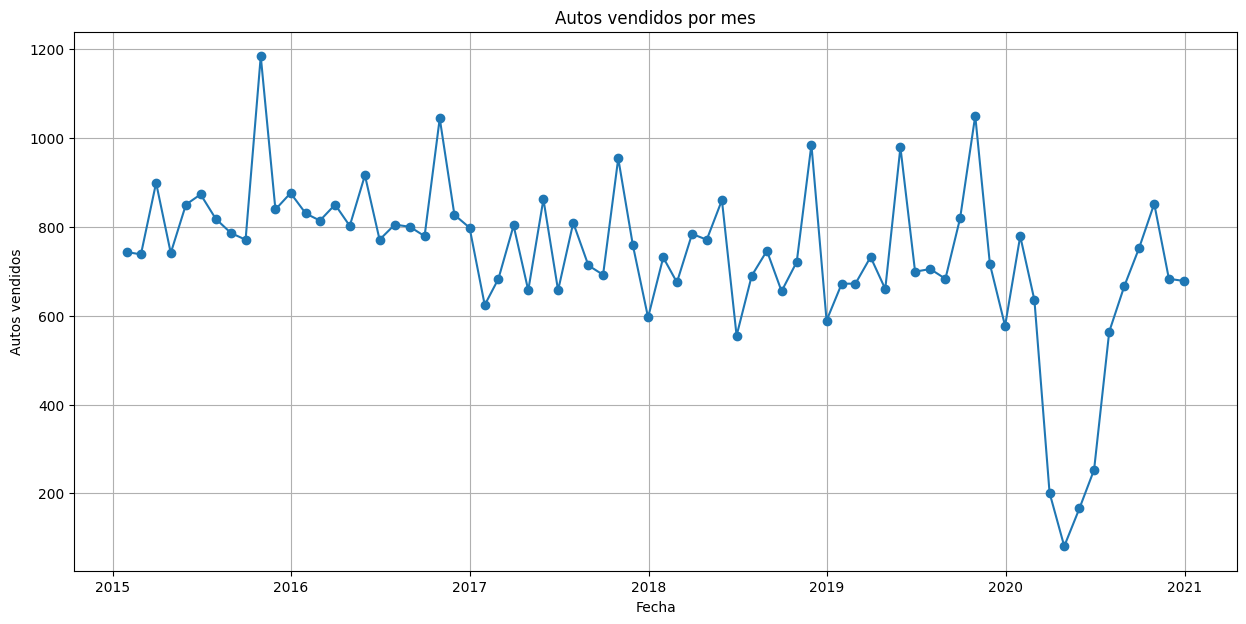

In [75]:
ventas_por_mes = data_ventas_autos.groupby(pd.Grouper(key='Fecha Venta', freq='M')).size().reset_index(name='Autos vendidos')

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(ventas_por_mes['Fecha Venta'], ventas_por_mes['Autos vendidos'], marker='o')
plt.xlabel('Fecha')
plt.ylabel('Autos vendidos')
plt.title('Autos vendidos por mes')
plt.grid(True)
plt.show()

In [5]:
data_ventas_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52999 entries, 0 to 52998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_Vehiculo       52999 non-null  int64         
 1   Cliente           52999 non-null  int64         
 2   Vendedor          52999 non-null  object        
 3   Origen_Venta      52996 non-null  object        
 4   Año_Venta         52999 non-null  int64         
 5   Fecha Venta       52999 non-null  datetime64[ns]
 6   Modelo            52999 non-null  int64         
 7   Color             52999 non-null  object        
 8   Precio_Venta_USD  52999 non-null  float64       
 9   IVA_USD           52999 non-null  object        
 10  Costo_USD         52999 non-null  float64       
 11  Satisfaccion      52999 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 4.9+ MB


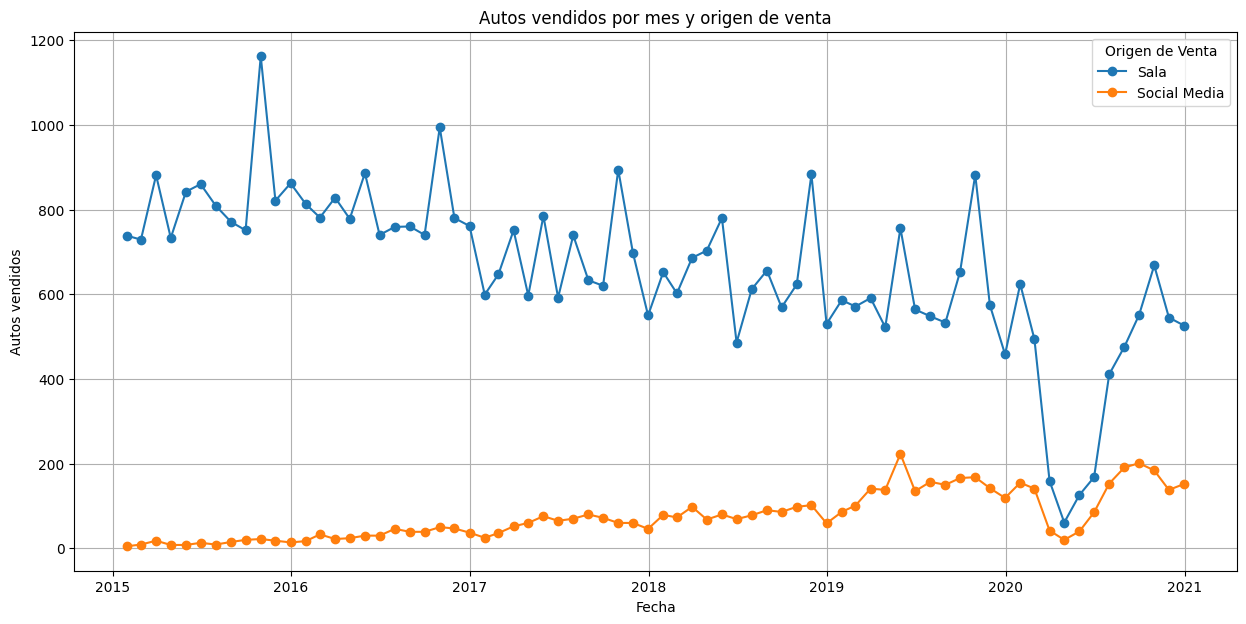

In [77]:
ventas_por_mes = data_ventas_autos.groupby([pd.Grouper(key='Fecha Venta', freq='M'), 'Origen_Venta']).size().reset_index(name='Autos vendidos')
# Pivot the data for plotting
ventas_por_mes_pivot = ventas_por_mes.pivot(index='Fecha Venta', columns='Origen_Venta', values='Autos vendidos')

# Plotting
plt.figure(figsize=(15, 7))
for col in ventas_por_mes_pivot.columns:
    plt.plot(ventas_por_mes_pivot.index, ventas_por_mes_pivot[col], marker='o', label=col)

plt.xlabel('Fecha')
plt.ylabel('Autos vendidos')
plt.title('Autos vendidos por mes y origen de venta')
plt.legend(title='Origen de Venta')
plt.grid(True)
plt.show()

In [6]:
data_clientes.head(5)

,ID_Cliente,Pais,Tipo_Persona,Genero,Edad_Actual,Cliente_Taller,Cliente_Repuesto
0,10001,Brasil,Natural,M,71,Si,No
1,10003,Brasil,Natural,F,60,Si,No
2,10005,Brasil,Natural,M,22,Si,No
3,10007,Brasil,Natural,F,31,Si,No
4,10009,Brasil,Natural,M,22,Si,No


In [7]:
data_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50961 entries, 0 to 50960
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID_Cliente        50961 non-null  int64 
 1   Pais              50961 non-null  object
 2   Tipo_Persona      50961 non-null  object
 3   Genero            50961 non-null  object
 4   Edad_Actual       50961 non-null  int64 
 5   Cliente_Taller    50961 non-null  object
 6   Cliente_Repuesto  50961 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.7+ MB


In [8]:
data_vendedores.head(5)

,ID_Vendedor,Sucursal
0,V0001,13
1,V0002,A2
2,V0003,01
3,V0004,2A
4,V0005,A1


In [9]:
data_vendedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID_Vendedor  1057 non-null   object
 1   Sucursal     1057 non-null   object
dtypes: object(2)
memory usage: 16.6+ KB


In [10]:
data_modelos_autos.head(5)

,ID_Modelo,Marca,Clase,Vehículo Comercial,Año Modelo,Tipo Combustible,Transmisión
0,4214,M0001,PANEL,No,2018,DIESEL,Manual
1,4215,M0001,PANEL,No,2019,DIESEL,Manual
2,4215,M0001,PANEL,No,2019,DIESEL,Manual
3,4216,M0001,PANEL,No,2020,DIESEL,Manual
4,4216,M0001,PANEL,No,2020,DIESEL,Manual


In [11]:
data_modelos_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3656 entries, 0 to 3655
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID_Modelo           3656 non-null   int64 
 1   Marca               3656 non-null   object
 2   Clase               3656 non-null   object
 3   Vehículo Comercial  3656 non-null   object
 4   Año Modelo          3656 non-null   int64 
 5   Tipo Combustible    3656 non-null   object
 6   Transmisión         3656 non-null   object
dtypes: int64(2), object(5)
memory usage: 200.1+ KB


## Transformación de tipos datos
Ejecutaremos las recomendaciones con tipos de datos:

Transformación a string
Validación de datos númericos
Validación de datos fecha y/o categoricos

In [12]:
data_ventas_autos['ID_Vehiculo'] = data_ventas_autos['ID_Vehiculo'].astype(str)
data_ventas_autos['Cliente'] = data_ventas_autos['Cliente'].astype(str)
data_ventas_autos['Modelo'] = data_ventas_autos['Modelo'].astype(str)
data_clientes['ID_Cliente'] = data_clientes['ID_Cliente'].astype(str)
data_modelos_autos['ID_Modelo'] = data_modelos_autos['ID_Modelo'].astype(str)

In [13]:
# Correcion de variables numerica
data_ventas_autos['IVA_USD'] = pd.to_numeric(data_ventas_autos['IVA_USD'].replace(',','.',regex = True))
data_ventas_autos.head(5)

,ID_Vehiculo,Cliente,Vendedor,Origen_Venta,Año_Venta,Fecha Venta,Modelo,Color,Precio_Venta_USD,IVA_USD,Costo_USD,Satisfaccion
0,32942,10001,V0901,Sala,2020,2020-12-29,4658,BLANCO,14688.53003,1909.51000,11442.36489,Regular
1,32944,10003,V0923,Sala,2020,2020-12-30,4367,NEGRO,11033.02319,1434.29302,8131.33809,Regular
2,32946,10005,V0357,Social Media,2020,2020-12-28,6093,GRIS,10040.91500,1305.32000,6466.34926,Muy Buena
3,32948,10007,V0503,Sala,2020,2020-12-23,5061,BLANCO,18853.11004,2450.90431,14498.04162,Muy Mala
4,32950,10009,V0400,Sala,2020,2020-12-29,6108,ROJO,12479.59247,1622.35000,8149.17388,Muy Buena


In [14]:
# Categoricas (nominales y ordinales)
data_ventas_autos['Satisfaccion'] = pd.Categorical(data_ventas_autos['Satisfaccion'],
               categories = ['Muy Mala', 'Mala', 'Regular', 'Buena', 'Muy Buena'],
               ordered = True)

In [15]:
data_ventas_autos['Origen_Venta'] = pd.Categorical(data_ventas_autos['Origen_Venta'],
               categories = ['Sala', 'Social Media'],
               ordered = False)

In [16]:
#filtramos solo los datos de Brasil
data_clientes_brasil = data_clientes.loc[(data_clientes.Pais == "Brasil")]

In [17]:
data_clientes_brasil.info()
#de 50961 entradas se pasó a 11409 emtradas

<class 'pandas.core.frame.DataFrame'>
Index: 11409 entries, 0 to 11408
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID_Cliente        11409 non-null  object
 1   Pais              11409 non-null  object
 2   Tipo_Persona      11409 non-null  object
 3   Genero            11409 non-null  object
 4   Edad_Actual       11409 non-null  int64 
 5   Cliente_Taller    11409 non-null  object
 6   Cliente_Repuesto  11409 non-null  object
dtypes: int64(1), object(6)
memory usage: 713.1+ KB


In [18]:
#filtramos os dados das vendas feiros somente aos clientes brasileiros
data_ventas_autos_brasil = data_ventas_autos.loc[data_ventas_autos['Cliente'].isin(data_clientes_brasil['ID_Cliente'])]

In [19]:
data_ventas_autos_brasil.info()
#De 52999 entradas en data_venta_autos se pasó a 12243 , exclusivo para o Brasil

<class 'pandas.core.frame.DataFrame'>
Index: 12243 entries, 0 to 12242
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_Vehiculo       12243 non-null  object        
 1   Cliente           12243 non-null  object        
 2   Vendedor          12243 non-null  object        
 3   Origen_Venta      12242 non-null  category      
 4   Año_Venta         12243 non-null  int64         
 5   Fecha Venta       12243 non-null  datetime64[ns]
 6   Modelo            12243 non-null  object        
 7   Color             12243 non-null  object        
 8   Precio_Venta_USD  12243 non-null  float64       
 9   IVA_USD           12243 non-null  float64       
 10  Costo_USD         12243 non-null  float64       
 11  Satisfaccion      12243 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 1.1+ MB


# Creación de nuevas variables


*   Crear las variable NPS dependiendo de la Satisfacción
*   Crear edad_cliente_compra
*   Crear la variable tipo_cliente: Cliente multirubro, Cliente prospección, Cliente Crecimiento, # depende de cliente_taller y cliente_repuesto  











## NPS

In [20]:
lambda df: 'Promotor' if df['Satisfaccion'] == 'Muy Buena' else ('Neutral' if df['Satisfaccion'] == 'Buena' else 'Detractor')

<function __main__.<lambda>(df)>

In [21]:
data_ventas_autos_brasil['NPS'] = data_ventas_autos_brasil['Satisfaccion'].apply(lambda satisfaccion: 'Promotor' if satisfaccion == 'Muy Buena' else ('Neutral' if satisfaccion == 'Buena' else 'Detractor'))


<ipython-input-21-166ba3aa4d14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ventas_autos_brasil['NPS'] = data_ventas_autos_brasil['Satisfaccion'].apply(lambda satisfaccion: 'Promotor' if satisfaccion == 'Muy Buena' else ('Neutral' if satisfaccion == 'Buena' else 'Detractor'))


In [22]:
data_ventas_autos_brasil.head(5)

,ID_Vehiculo,Cliente,Vendedor,Origen_Venta,Año_Venta,Fecha Venta,Modelo,Color,Precio_Venta_USD,IVA_USD,Costo_USD,Satisfaccion,NPS
0,32942,10001,V0901,Sala,2020,2020-12-29,4658,BLANCO,14688.53003,1909.51000,11442.36489,Regular,Detractor
1,32944,10003,V0923,Sala,2020,2020-12-30,4367,NEGRO,11033.02319,1434.29302,8131.33809,Regular,Detractor
2,32946,10005,V0357,Social Media,2020,2020-12-28,6093,GRIS,10040.91500,1305.32000,6466.34926,Muy Buena,Promotor
3,32948,10007,V0503,Sala,2020,2020-12-23,5061,BLANCO,18853.11004,2450.90431,14498.04162,Muy Mala,Detractor
4,32950,10009,V0400,Sala,2020,2020-12-29,6108,ROJO,12479.59247,1622.35000,8149.17388,Muy Buena,Promotor


<ipython-input-41-94e9aec99528>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data_ventas_autos_brasil, x='Año_Venta', y='NPS', inner='box', palette='Dark2')


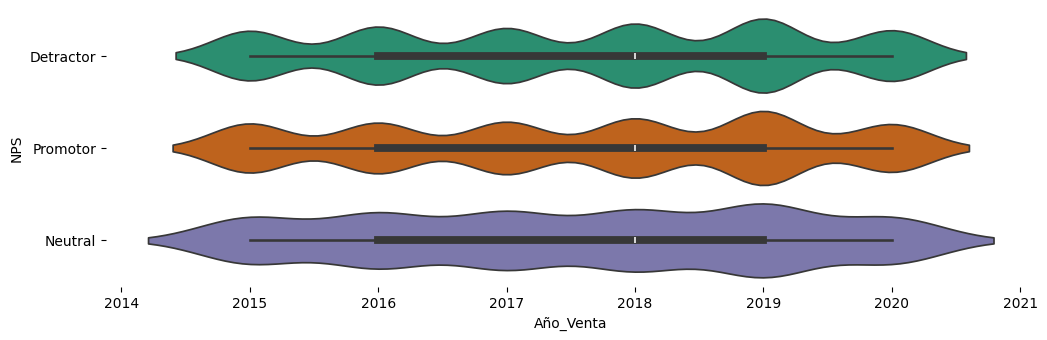

In [41]:
# @title NPS vs Año_Venta

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data_ventas_autos_brasil['NPS'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data_ventas_autos_brasil, x='Año_Venta', y='NPS', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

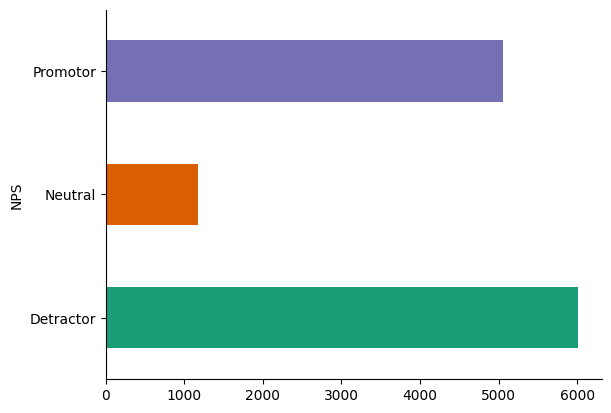

In [40]:
# @title NPS

from matplotlib import pyplot as plt
import seaborn as sns
data_ventas_autos_brasil.groupby('NPS').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Edad Compra

In [23]:
año_actual = 2023
data_ventas_autos_brasil['Edad_cliente']= data_clientes['Edad_Actual'] - (año_actual - data_ventas_autos['Año_Venta'])

<ipython-input-23-b6978dad3ec1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ventas_autos_brasil['Edad_cliente']= data_clientes['Edad_Actual'] - (año_actual - data_ventas_autos['Año_Venta'])


In [24]:
data_ventas_autos_brasil.head(5)

,ID_Vehiculo,Cliente,Vendedor,Origen_Venta,Año_Venta,Fecha Venta,Modelo,Color,Precio_Venta_USD,IVA_USD,Costo_USD,Satisfaccion,NPS,Edad_cliente
0,32942,10001,V0901,Sala,2020,2020-12-29,4658,BLANCO,14688.53003,1909.51000,11442.36489,Regular,Detractor,68.0
1,32944,10003,V0923,Sala,2020,2020-12-30,4367,NEGRO,11033.02319,1434.29302,8131.33809,Regular,Detractor,57.0
2,32946,10005,V0357,Social Media,2020,2020-12-28,6093,GRIS,10040.91500,1305.32000,6466.34926,Muy Buena,Promotor,19.0
3,32948,10007,V0503,Sala,2020,2020-12-23,5061,BLANCO,18853.11004,2450.90431,14498.04162,Muy Mala,Detractor,28.0
4,32950,10009,V0400,Sala,2020,2020-12-29,6108,ROJO,12479.59247,1622.35000,8149.17388,Muy Buena,Promotor,19.0


## Tipo Cliente

In [25]:
lambda df: 'Cliente multirubro' if df['Cliente_Taller'] == 'Si' and df['Cliente_Repuesto'] == 'Si' else ('Cliente prospección' if df['Cliente_Taller'] == 'No' and df['Cliente_Repuesto'] == 'No' else 'Cliente crecimiento')

<function __main__.<lambda>(df)>

In [26]:
data_clientes['Tipo_cliente'] = data_clientes.apply(lambda df: 'Cliente multirubro' if df['Cliente_Taller'] == 'Si' and df['Cliente_Repuesto'] == 'Si' else ('Cliente prospección' if df['Cliente_Taller'] == 'No' and df['Cliente_Repuesto'] == 'No' else 'Cliente crecimiento'),axis =1)

In [27]:
data_clientes

,ID_Cliente,Pais,Tipo_Persona,Genero,Edad_Actual,Cliente_Taller,Cliente_Repuesto,Tipo_cliente
0,10001,Brasil,Natural,M,71,Si,No,Cliente crecimiento
1,10003,Brasil,Natural,F,60,Si,No,Cliente crecimiento
2,10005,Brasil,Natural,M,22,Si,No,Cliente crecimiento
3,10007,Brasil,Natural,F,31,Si,No,Cliente crecimiento
4,10009,Brasil,Natural,M,22,Si,No,Cliente crecimiento
...,...,...,...,...,...,...,...,...
50956,115827,Colombia,Natural,M,32,Si,Si,Cliente multirubro
50957,115829,Colombia,Natural,M,68,No,Si,Cliente crecimiento
50958,115833,Colombia,Natural,M,70,Si,Si,Cliente multirubro
50959,115835,Colombia,Natural,M,46,Si,Si,Cliente multirubro


## Total de venta

Total de venta = Precio de venta + IVA

In [28]:
data_ventas_autos_brasil['Total_venta']= data_ventas_autos['Precio_Venta_USD'] + data_ventas_autos['IVA_USD']
data_ventas_autos_brasil.head(5)

<ipython-input-28-60ee7ca9c081>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ventas_autos_brasil['Total_venta']= data_ventas_autos['Precio_Venta_USD'] + data_ventas_autos['IVA_USD']


,ID_Vehiculo,Cliente,Vendedor,Origen_Venta,Año_Venta,Fecha Venta,Modelo,Color,Precio_Venta_USD,IVA_USD,Costo_USD,Satisfaccion,NPS,Edad_cliente,Total_venta
0,32942,10001,V0901,Sala,2020,2020-12-29,4658,BLANCO,14688.53003,1909.51000,11442.36489,Regular,Detractor,68.0,16598.04003
1,32944,10003,V0923,Sala,2020,2020-12-30,4367,NEGRO,11033.02319,1434.29302,8131.33809,Regular,Detractor,57.0,12467.31621
2,32946,10005,V0357,Social Media,2020,2020-12-28,6093,GRIS,10040.91500,1305.32000,6466.34926,Muy Buena,Promotor,19.0,11346.23500
3,32948,10007,V0503,Sala,2020,2020-12-23,5061,BLANCO,18853.11004,2450.90431,14498.04162,Muy Mala,Detractor,28.0,21304.01435
4,32950,10009,V0400,Sala,2020,2020-12-29,6108,ROJO,12479.59247,1622.35000,8149.17388,Muy Buena,Promotor,19.0,14101.94247


## Utilidad

Precio de venta - Costo

In [29]:
data_ventas_autos_brasil['Utilidad']= data_ventas_autos['Precio_Venta_USD'] - data_ventas_autos['Costo_USD']
data_ventas_autos_brasil.head(5)

<ipython-input-29-379804f7cfb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ventas_autos_brasil['Utilidad']= data_ventas_autos['Precio_Venta_USD'] - data_ventas_autos['Costo_USD']


,ID_Vehiculo,Cliente,Vendedor,Origen_Venta,Año_Venta,Fecha Venta,Modelo,Color,Precio_Venta_USD,IVA_USD,Costo_USD,Satisfaccion,NPS,Edad_cliente,Total_venta,Utilidad
0,32942,10001,V0901,Sala,2020,2020-12-29,4658,BLANCO,14688.53003,1909.51000,11442.36489,Regular,Detractor,68.0,16598.04003,3246.16514
1,32944,10003,V0923,Sala,2020,2020-12-30,4367,NEGRO,11033.02319,1434.29302,8131.33809,Regular,Detractor,57.0,12467.31621,2901.68510
2,32946,10005,V0357,Social Media,2020,2020-12-28,6093,GRIS,10040.91500,1305.32000,6466.34926,Muy Buena,Promotor,19.0,11346.23500,3574.56574
3,32948,10007,V0503,Sala,2020,2020-12-23,5061,BLANCO,18853.11004,2450.90431,14498.04162,Muy Mala,Detractor,28.0,21304.01435,4355.06842
4,32950,10009,V0400,Sala,2020,2020-12-29,6108,ROJO,12479.59247,1622.35000,8149.17388,Muy Buena,Promotor,19.0,14101.94247,4330.41859


# Tablas Resumen

## Cantidad de vehículos vendidos por sucursal y vendedor.

In [30]:
Consolidado_Sucursal = pd.merge(data_ventas_autos_brasil, data_vendedores, how = 'left', left_on='Vendedor', right_on='ID_Vendedor')

In [31]:
Consolidado_Sucursal.head(5)

,ID_Vehiculo,Cliente,Vendedor,Origen_Venta,Año_Venta,Fecha Venta,Modelo,Color,Precio_Venta_USD,IVA_USD,Costo_USD,Satisfaccion,NPS,Edad_cliente,Total_venta,Utilidad,ID_Vendedor,Sucursal
0,32942,10001,V0901,Sala,2020,2020-12-29,4658,BLANCO,14688.53003,1909.51000,11442.36489,Regular,Detractor,68.0,16598.04003,3246.16514,V0901,D2
1,32944,10003,V0923,Sala,2020,2020-12-30,4367,NEGRO,11033.02319,1434.29302,8131.33809,Regular,Detractor,57.0,12467.31621,2901.68510,V0923,M1
2,32946,10005,V0357,Social Media,2020,2020-12-28,6093,GRIS,10040.91500,1305.32000,6466.34926,Muy Buena,Promotor,19.0,11346.23500,3574.56574,V0357,KR
3,32948,10007,V0503,Sala,2020,2020-12-23,5061,BLANCO,18853.11004,2450.90431,14498.04162,Muy Mala,Detractor,28.0,21304.01435,4355.06842,V0503,A4
4,32950,10009,V0400,Sala,2020,2020-12-29,6108,ROJO,12479.59247,1622.35000,8149.17388,Muy Buena,Promotor,19.0,14101.94247,4330.41859,V0400,D1


In [32]:
#con tablas de frecuencia
Consolidado_Sucursal[['Sucursal', 'Vendedor']].value_counts().reset_index(name='Frecuencia').sort_values(by='Sucursal')


,Sucursal,Vendedor,Frecuencia
121,08,V0474,26
35,08,V0704,110
77,08,V0714,61
133,08,V0197,20
21,39,V0742,152
...,...,...,...
169,M1,V0074,7
132,M1,V0105,20
170,M3,V0576,6
199,M4,V0465,1


## Exportar datos

Guardar en un archivo de Microsoft Excel, la siguiente tabla:

1.   En filas la sucursal y el vendedor
2.   En columnas, el origen venta y nivel de satisfacción
3.   Como cálculos, la cantidad de autos vendidos, el total de venta (precio venta más iva) y la utilidad

In [56]:
df_consolidado_brasil = pd.pivot_table(Consolidado_Sucursal,
    index=['Sucursal', 'ID_Vendedor'],
    columns=['Origen_Venta','Satisfaccion'],
    values=['Total_venta','Utilidad'],
    aggfunc = {'Total_venta': 'max', 'Utilidad': 'max'}
)


In [57]:
df_consolidado_brasil.head(5)


Total_venta                                         \
Origen_Venta                 Sala                                          
Satisfaccion             Muy Mala         Mala      Regular        Buena   
Sucursal ID_Vendedor                                                       
08       V0197        20685.89322   8586.71173  13724.70004  15318.48150   
         V0474        10809.37624   9450.34554  15980.07076   7617.65201   
         V0704        13246.56703  20063.12063  12448.04346  11002.32310   
         V0714        18188.19935  23382.01565  16553.40414  19319.44041   
39       V0742        24849.94453  36722.67458  27871.79092  45955.61876   

                                                                             \
Origen_Venta                      Social Media                                
Satisfaccion            Muy Buena     Muy Mala Mala Regular Buena Muy Buena   
Sucursal ID_Vendedor                                                          
08       V0197        11473.05265          NaN  NaN     NaN   NaN       NaN   
         V0474        11106.01425          NaN  NaN     NaN   NaN       NaN   
         V0704        14912.85438          NaN  NaN     NaN   NaN       NaN   
         V0714        20267.54220          NaN  NaN     NaN   NaN       NaN   
39       V0742        62009.67715          NaN  NaN     NaN   NaN       NaN   

                        Utilidad                                       \
Origen_Venta                Sala                                        
Satisfaccion            Muy Mala        Mala     Regular        Buena   
Sucursal ID_Vendedor                                                    
08       V0197        5546.74836  1937.70974  4676.11377   3153.51142   
         V0474        3041.93066  2751.43248  4992.00440   1813.40486   
         V0704        2606.18081  6516.07546  3718.13033   3348.26013   
         V0714        5440.36328  7966.43758  4747.31607   6650.67481   
39       V0742        8554.53842  7840.29960  8558.85942  10248.50967   

                                                                             
Origen_Venta                      Social Media                               
Satisfaccion            Muy Buena     Muy Mala Mala Regular Buena Muy Buena  
Sucursal ID_Vendedor                                                         
08       V0197         3675.43764          NaN  NaN     NaN   NaN       NaN  
         V0474         3361.29031          NaN  NaN     NaN   NaN       NaN  
         V0704         3959.16432          NaN  NaN     NaN   NaN       NaN  
         V0714         6528.66112          NaN  NaN     NaN   NaN       NaN  
39       V0742        13115.32030          NaN  NaN     NaN   NaN       NaN

In [35]:
df_consolidado_brasil.to_excel('Tabela_final_1.xlsx')
# para guardar un archivo en excel con la informacion solicitada

## `Tabla crosstab`


In [36]:
df_consolidado_ano = pd.pivot_table(Consolidado_Sucursal,
    index=['Año_Venta'],

    values=['Total_venta','Utilidad']

)

In [37]:
df_consolidado_ano


,Total_venta,Utilidad
Año_Venta,,
2015,12747.313568,3368.879384
2016,13113.796576,3491.161419
2017,13362.972242,3548.881556
2018,13646.035058,3632.327310
2019,13895.794429,3675.469647
2020,14208.636608,3815.632394


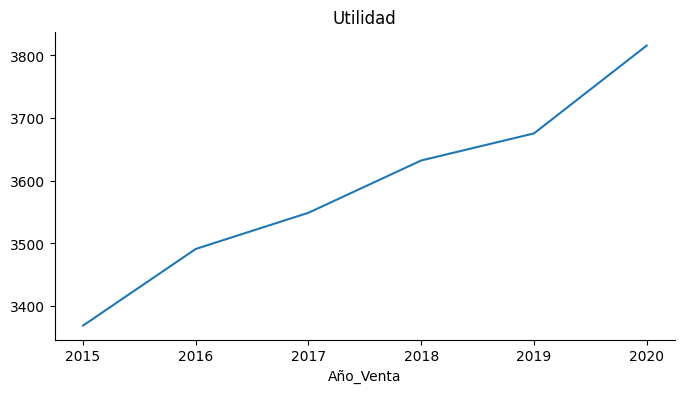

In [39]:
# @title Utilidad

from matplotlib import pyplot as plt
df_consolidado_ano['Utilidad'].plot(kind='line', figsize=(8, 4), title='Utilidad')
plt.gca().spines[['top', 'right']].set_visible(False)